# Corona weather analyses Switzerland 🇨🇭
Roald Ruiter, 12 April

## Abstract
Here I do the [same analyses](https://github.com/Roald87/CoronaWeather/blob/master/CoronaWeather.ipynb) as what I did for the Netherlands, but then for Switzerland. Historical data comes from [here](https://data.geo.admin.ch/ch.meteoschweiz.klima/nbcn-tageswerte/nbcn-tageswerte-1864-2018.zip) and 2020 from [here](https://data.geo.admin.ch/ch.meteoschweiz.klima/nbcn-tageswerte/VQEA34.csv). For the plots I only selected weather stations < 1000 m.

In [1]:
!pip install astral
!pip install altair_data_server

In [2]:
import altair as alt
from weather import (
    get_swiss_weather_data,
    calculate_rolling_mean,
    plot_delta_temp,
    plot_max_sun_hours
)

alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
swiss_weather = get_swiss_weather_data(startdate='19500101')

swiss_weather.tail()

,sun_h,min_temp,max_temp,delta_temp,max_sun_hours
date,,,,,
2020-04-07,11.142529,2.031034,16.655172,14.624138,NaN
2020-04-08,11.004023,2.720690,16.468966,13.748276,NaN
2020-04-09,9.445402,3.289655,16.724138,13.434483,NaN
2020-04-10,11.196552,3.565517,17.486207,13.920690,NaN
2020-04-11,11.102299,3.755172,17.755172,14.000000,NaN


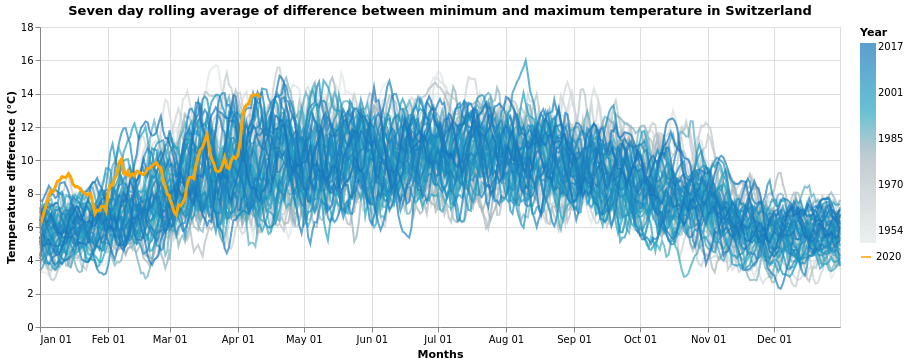

In [12]:
rolling_mean_frame = [-3, 3]

base = calculate_rolling_mean(swiss_weather, rolling_mean_frame)
line_old, line_2020 = plot_delta_temp(base)

(line_old + line_2020).properties(
    width=800,
    title='Seven day rolling average of difference between minimum and maximum temperature in Switzerland'
)

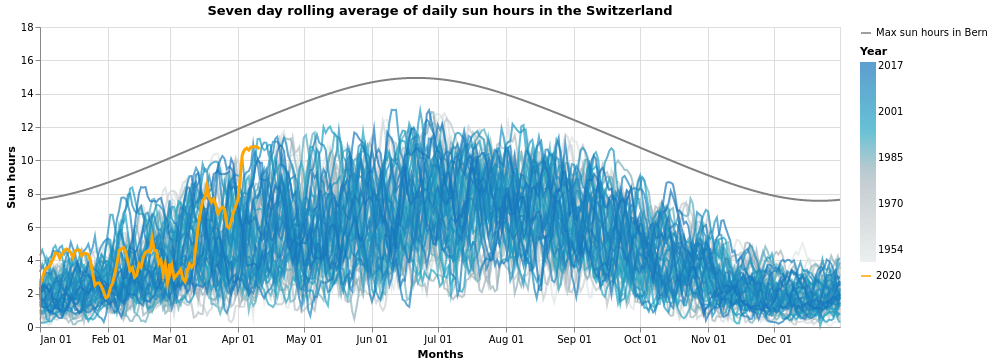

In [13]:
max_sun, line_old, line_2020 = plot_max_sun_hours(base, "Bern")

(max_sun + line_old + line_2020).properties(
    width=800,
    title='Seven day rolling average of daily sun hours in the Switzerland'
)